# **Identical Meme Classification: A Neural network approach**
<hr><hr>

## Problem statement :
<hr>
The project aims to test the existing neural network algorithm for image classification of Meme images which are very similar to each other.

*The entire project takes 12-15 minutes to run in GPU environment.*

Dataset reference is taken from kaggle: 

-> Dataset : [Chihuaha Vs Muffin](https://www.kaggle.com/datasets/returnofsputnik/chihuahua-or-muffin)

-> Dataset : [Dog Vs Bagel](https://www.kaggle.com/datasets/returnofsputnik/puppy-or-bagel)

Meme 1:  Chihuaha Vs Muffin

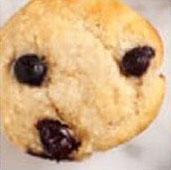 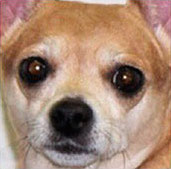

Meme 2: Dog Vs Bagel

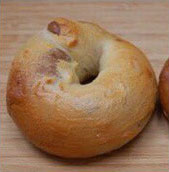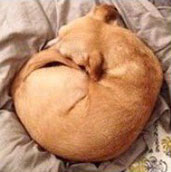


# Uploading data:
<hr>

We have uploaded Meme images in a webserver for the ease of use, we will call the zip file and unzip it.

In [1]:
!wget www.sanjay.ie/aditya/BACKUP.zip

--2022-07-30 09:50:22--  http://www.sanjay.ie/aditya/BACKUP.zip
Resolving www.sanjay.ie (www.sanjay.ie)... 81.16.28.117
Connecting to www.sanjay.ie (www.sanjay.ie)|81.16.28.117|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 377042 (368K) [application/zip]
Saving to: ‘BACKUP.zip’

BACKUP.zip          100%[===================>] 368.21K   448KB/s    in 0.8s    

2022-07-30 09:50:24 (448 KB/s) - ‘BACKUP.zip’ saved [377042/377042]



In [2]:
#Unzip the file which we called
!unzip /content/BACKUP.zip

Archive:  /content/BACKUP.zip
   creating: BACKUP/
   creating: BACKUP/Bagel/
  inflating: BACKUP/Bagel/bagel-1.jpg  
  inflating: BACKUP/Bagel/bagel-2.jpg  
  inflating: BACKUP/Bagel/bagel-3.jpg  
  inflating: BACKUP/Bagel/bagel-4.jpg  
  inflating: BACKUP/Bagel/bagel-5.jpg  
  inflating: BACKUP/Bagel/bagel-6.jpg  
  inflating: BACKUP/Bagel/bagel-7.jpg  
  inflating: BACKUP/Bagel/bagel-8.jpg  
   creating: BACKUP/BagelDog/
  inflating: BACKUP/BagelDog/dog-1.jpg  
  inflating: BACKUP/BagelDog/dog-2.jpg  
  inflating: BACKUP/BagelDog/dog-3.jpg  
  inflating: BACKUP/BagelDog/dog-4.jpg  
  inflating: BACKUP/BagelDog/dog-5.jpg  
  inflating: BACKUP/BagelDog/dog-6.jpg  
  inflating: BACKUP/BagelDog/dog-7.jpg  
  inflating: BACKUP/BagelDog/dog-8.jpg  
   creating: BACKUP/Chihuaha/
  inflating: BACKUP/Chihuaha/chihuahua-1.jpg  
  inflating: BACKUP/Chihuaha/chihuahua-2.jpg  
  inflating: BACKUP/Chihuaha/chihuahua-3.jpg  
  inflating: BACKUP/Chihuaha/chihuahua-4.jpg  
  inflating: BACKUP/Chihua

## Libraries used for the project:
<hr>

In Google colab supports most of the Machine learning libraries available in the market since its based on python. For our project, we will just need to call the below libraries. 

In [3]:
#!rm -rf BACKUP.zip
#!rm -rf BACKUP/
#!rm -rf GeneratedImages/
#!rm -rf ModelImg/
#install all libraries as mentioned in readme
!pip install colorama
import warnings
warnings.filterwarnings('ignore')
import random
import numpy as np
import matplotlib.pyplot as plt
import os
import math
import shutil
import glob
import keras
import seaborn as sns
import colorama
import tensorflow

#Using below functions from imported libraries
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, BatchNormalization, GlobalAvgPool2D
from keras.models import Sequential
from keras.preprocessing.image import load_img, img_to_array
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
from google.colab import files
from IPython.display import Image
from colorama import Fore

#Setting seed 
np.random.seed(123)
#random.seed(123)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Setting up the stage with all directories, where the images will be saved in the colab directory.

In [4]:
# Setting up the directories which will be used later
path = '/content/BACKUP'
data_dir_1 = '/content/BACKUP'
savedir_1 = '/content/GeneratedImages/MEME'
ModelPath_1 = '/content/ModelImg/MEME'

#Creating the directories
os.mkdir('/content/GeneratedImages/')
os.mkdir('/content/ModelImg/')
os.mkdir(savedir_1)
os.mkdir(ModelPath_1)


The dataset images we got online is very small. For each class there is 8 images, hence there is a need of sampling more images for training the model. 

In [5]:
# Types of classes we want to differentiate
types = ["Bagel","BagelDog","Chihuaha","Muffin"]
nimgs = {}
for i in types:
    nimages = len(os.listdir(os.path.join(data_dir_1,i)))
    nimgs[i]=nimages
print(nimgs)

{'Bagel': 8, 'BagelDog': 8, 'Chihuaha': 8, 'Muffin': 8}


## Image Data Generator:
<hr>

For these specific memes, we have 8 images per class, which is not enough for training the Model. Hence the image data generator feature from python is employed to create multiple images. Here will rotate, shift, increase/decrease height, rescale, zoom.

Using this the Image Data Generator can create hundreds of unique images.

In [6]:
#Using Image datagenerator feature to increase the number of images, we can use this feature directly while modelling, but showing this seperately to display the difference
datagen = ImageDataGenerator(
        rotation_range=50,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode='nearest')


def GenImage(origin,destination,types):
  #Run for all the classes
  for filename in types:
      #Stoing path and creating the directory
      directory = os.path.join(origin,filename)
      os.mkdir(os.path.join(destination,filename))
      #Taking one image, converting it to array, then modifyinh it and finally doing this process 200 times to create 200 images out of one
      for pic in os.listdir(directory):
          picture = os.path.join(directory, pic) 
          picuse = load_img(picture)
          pic_array = img_to_array(picuse)
          X = pic_array.reshape((1,) + pic_array.shape) # Converting into 4 dimension array
          count = 0
          for batch in datagen.flow(X, batch_size=1,save_to_dir=os.path.join(destination,filename), save_prefix=filename, save_format='jpeg'):
              count += 1
              if count > 201:
                  break

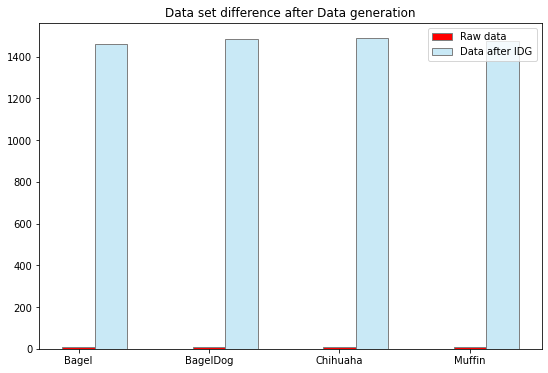

In [7]:
#Generating images here
GenImage(data_dir_1,savedir_1,types)

#Plotting the difference
nimgs = {}
genimgs = {}
for i in types:
    nimages = len(os.listdir(os.path.join(data_dir_1,i)))
    nimgs[i]=nimages
    nimages = len(os.listdir(os.path.join(savedir_1,i)))
    genimgs[i]=nimages

barWidth = 0.25
br1 = np.arange(len(nimgs))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

plt.figure(figsize=(9, 6))
plt.bar(br1, list(nimgs.values()) , width = barWidth,
        edgecolor ='grey', color ='r', label ='Raw data')
plt.bar(br2,list(genimgs.values()), width = barWidth,
        edgecolor ='grey', color ='#c9e9f6', label ='Data after IDG')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Data set difference after Data generation')
plt.legend(loc="upper right")
plt.show()

After Image data generation there is a huge difference in samples now. All images are unique and is ready for training & testing images.

Since we have achieved this now, the data can be distributed into: 
<ul>

<li>60% =  Training set</li>
<li>20% = Validation set</li>
<li>20% = Test set</li>
</ul>

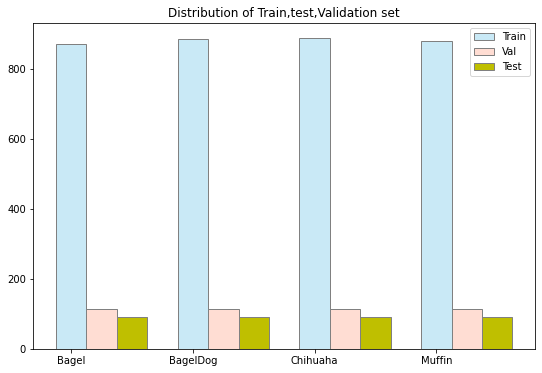

In [8]:
#Code to split data
def datafolder(origin,destination,types,split,name):
  for filename in types:
    directory = os.path.join(origin,filename)
    os.mkdir(os.path.join(destination,name,filename))
    for img in np.random.choice(a=os.listdir(directory),
                                   size=(math.floor(split*len(os.listdir(directory)))-5),
                                   replace=False):
      O = os.path.join(directory,img)
      D = os.path.join(destination,name,filename)
      shutil.copy(O,D)
      os.remove(O)
#First creating the folders and then adding image to it
os.mkdir(os.path.join(ModelPath_1,"train"))
datafolder(savedir_1,ModelPath_1,types,0.60,"train")
os.mkdir(os.path.join(ModelPath_1,"val"))
datafolder(savedir_1,ModelPath_1,types,0.20,"val")
os.mkdir(os.path.join(ModelPath_1,"test"))
datafolder(savedir_1,ModelPath_1,types,0.20,"test")

# Plotting the dataset
trainimgs = {}
valimgs = {}
testimgs = {}
for i in types:
    nimages = len(os.listdir(os.path.join(ModelPath_1,"train",i)))
    trainimgs[i]=nimages
    nimages = len(os.listdir(os.path.join(ModelPath_1,"val",i)))
    valimgs[i]=nimages
    nimages = len(os.listdir(os.path.join(ModelPath_1,"test",i)))
    testimgs[i]=nimages
barWidth = 0.25
br1 = np.arange(len(nimgs))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

plt.figure(figsize=(9, 6))
plt.bar(br1, list(trainimgs.values()) , width = barWidth,
        edgecolor ='grey', color ='#c9e9f6', label ='Train')
plt.bar(br2,list(valimgs.values()), width = barWidth,
        edgecolor ='grey', color ='#FFDDD3', label ='Val')
plt.bar(br3,list(testimgs.values()), width = barWidth,
        edgecolor ='grey', color ='y', label ='Test')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Distribution of Train,test,Validation set')
plt.legend(loc="upper right")
plt.show()

Displaying some ranom images created and stored in training set.

Bagel_0_2146.jpeg
Bagel_0_2321.jpeg
Bagel_0_9974.jpeg
BagelDog_0_1474.jpeg
BagelDog_0_8463.jpeg
BagelDog_0_9652.jpeg
Chihuaha_0_8531.jpeg
Bagel_0_2405.jpeg
Bagel_0_6390.jpeg
BagelDog_0_5310.jpeg


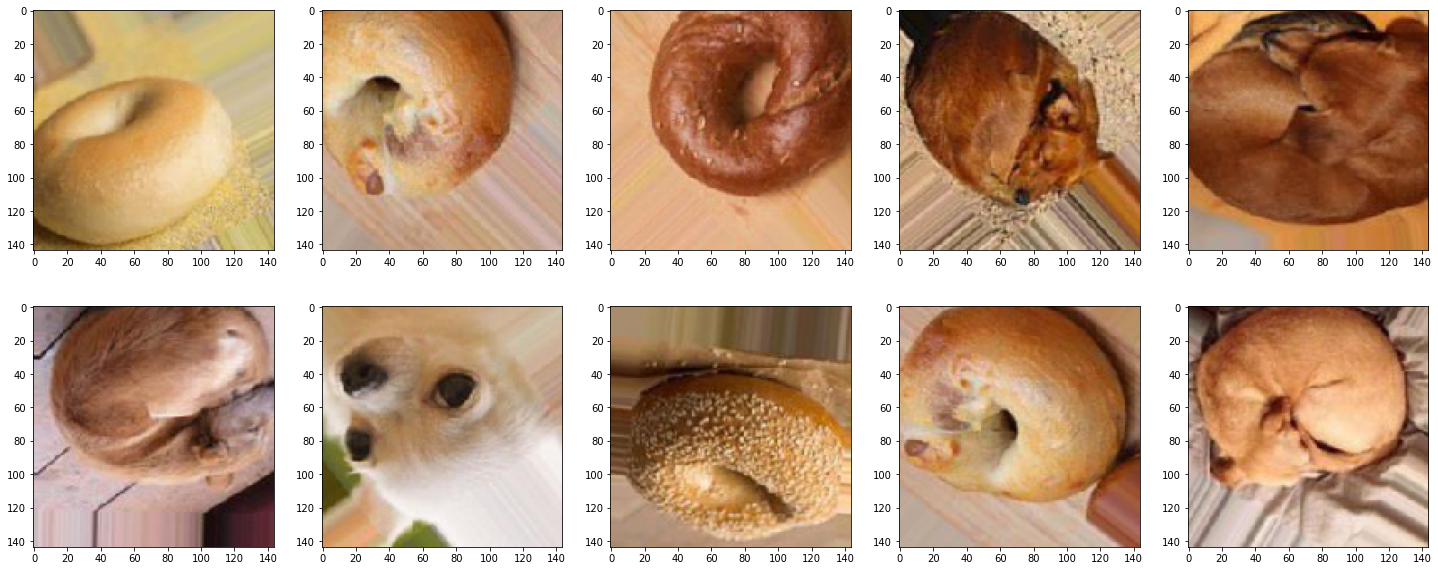

In [9]:
def Imgshow():
  type = random.choice(os.listdir(savedir_1))
  path  = os.path.join(savedir_1,type)
  randimg = random.choice(os.listdir(path))
  img = load_img(os.path.join(savedir_1,type,randimg), target_size=(144,144))
  input_arr = img_to_array(img)/255
  return(input_arr,randimg)
rows=2
cols = 5
show = 10
img_count = 0
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(25,10))
names=[]
for i in range(rows):
    for j in range(cols):        
        if img_count < show:
            randomImages = Imgshow()
            img = randomImages[0]
            name = randomImages[1]
            axes[i, j].imshow(img)
            img_count+=1
            names.append(name)
for i in range(10):
  print(names[i])

## Creating a Model :
<hr>

<ol><li>
Here, the model created has 5 convolution 2D layers with activation function as relu.</li><li>

The filter size is doubled in the consecutive layer to zoom into the image.
</li><li>
Maxpool 2d layer is used to select the significant to take the maximum value over an input window. Maxpool is used thrice in this model. 
</li><li>
The Dropout layer is used as a to remove 25%  of the unused/insignificant neurons, due to which their contribution to next layer is nullified. The rest of the neurons are kept active and unmodified. Dropout is used twice in the model.
</li><li>
Flatten layer is used to convert multidimensional output to make it linear to pass it onto a Dense layer.
</li><li>
In final dense layer softmax function is used as activation function, here n=4, since there are 4 classes to choose from.</li></ol>

In [10]:
ImageSize = 144
model = Sequential()
model.add(Conv2D(filters =16, kernel_size=(3,3), activation='relu', input_shape=(ImageSize,ImageSize,3) ))
model.add(Conv2D(filters =36, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters =64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters =128, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(rate=0.25))

model.add(Dense(units=4, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 142, 142, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 140, 140, 36)      5220      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 70, 70, 36)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 68, 68, 64)        20800     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 34, 34, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 128)       7

In [11]:
#preprocessing the images before the classificaion and model training
batch_size = 32
def preprocessomgImagesTrain(path):
  image_data = ImageDataGenerator(zoom_range=0.2,shear_range=0.2,rescale=1. / 255,horizontal_flip=True)
  image = image_data.flow_from_directory(directory=path, target_size = (144,144), batch_size=batch_size, class_mode='categorical')
  return image

def preprocessomgImagesTest(path):
  image_data = ImageDataGenerator(zoom_range=0.2,shear_range=0.2,rescale=1. / 255,horizontal_flip=True)
  image = image_data.flow_from_directory(directory=path, target_size = (144,144), batch_size=batch_size, class_mode='categorical',shuffle = False)
  return image

#Compiling the model
model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy,
              metrics=['accuracy'])


## Preprocessing Images:

<hr>
This is one of the most important steps, here, the images are all converted into same pixel size (144,144). Image datagenerator is again used so every time if same image is picked they will have some unique difference from previous one.

Finally the images are converted into array and stored in batches of 32.

The important difference between preprocessing of training and testing data is `shuffle=False`. This is used in testing phase so that the imagesare not radomly picked but in sequential order so that while predicting we can compare without randomization. 

In [12]:
path='/content/ModelImg/MEME/train'
train_Muffin= preprocessomgImagesTrain(path)

Found 3524 images belonging to 4 classes.


In [13]:
path='/content/ModelImg/MEME/val'
val_Muffin= preprocessomgImagesTest(path)

Found 457 images belonging to 4 classes.


In [14]:
path='/content/ModelImg/MEME/test'
test_Muffin= preprocessomgImagesTest(path)

Found 365 images belonging to 4 classes.


To reduce the time and increase the efficiency of the model we have introduced early stopping, wherein the validation accuracy is monitored and if the validation accuracy doesn't increase in 15 epochs, the model will be stopped. Also the best model is saved every iteration.

Epoch 1/100
16/16 [==============================] - 19s 363ms/step - loss: 1.2956 - accuracy: 0.3047 - val_loss: 1.1384 - val_accuracy: 0.4245
Epoch 2/100
16/16 [==============================] - 5s 341ms/step - loss: 1.1195 - accuracy: 0.4375 - val_loss: 1.0188 - val_accuracy: 0.5580
Epoch 3/100
16/16 [==============================] - 5s 341ms/step - loss: 1.0234 - accuracy: 0.5098 - val_loss: 0.8778 - val_accuracy: 0.6258
Epoch 4/100
16/16 [==============================] - 5s 342ms/step - loss: 0.8888 - accuracy: 0.5625 - val_loss: 0.7913 - val_accuracy: 0.6980
Epoch 5/100
16/16 [==============================] - 5s 338ms/step - loss: 0.8777 - accuracy: 0.5840 - val_loss: 0.8322 - val_accuracy: 0.5952
Epoch 6/100
16/16 [==============================] - 5s 342ms/step - loss: 0.7731 - accuracy: 0.6523 - val_loss: 0.6728 - val_accuracy: 0.6740
Epoch 7/100
16/16 [==============================] - 6s 398ms/step - loss: 0.6675 - accuracy: 0.7305 - val_loss: 0.5476 - val_accuracy: 0.794

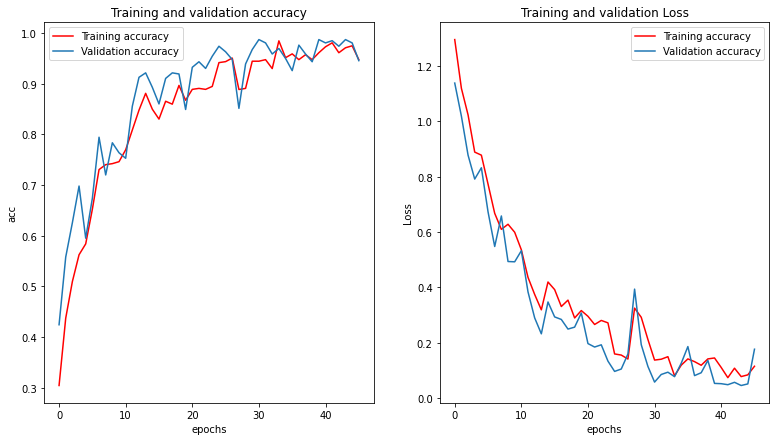

In [15]:
epochs=100
#early stopping and model checking introduced here
es = EarlyStopping(monitor="val_accuracy", patience=15, verbose = 1, mode="auto")
MuffinModel = ModelCheckpoint(filepath = "/content/model.h5", monitor = "val_accuracy", save_freq=epochs,  verbose=1, save_best_only = True)

cb = [es,MuffinModel]
#Runing the model
M_model = model.fit_generator(generator=train_Muffin,
                              steps_per_epoch=16,
                              epochs=epochs,
                              verbose=1,
                              validation_data=val_Muffin,
                              callbacks=cb)

#Plotting the accuracy and other key factors from the model  
acc = M_model.history['accuracy']
val = M_model.history['val_accuracy']
loss = M_model.history['loss']
val_loss = M_model.history['val_loss']
epochs = range(len(acc))


fig, (a1,a2) = plt.subplots(1, 2, figsize=(13,7))
a1.plot(epochs, acc, 'r', label='Training accuracy')
a1.plot(epochs, val,label='Validation accuracy')
a1.set_xlabel('epochs')
a1.set_ylabel('acc')
a1.set_title('Training and validation accuracy')

a1.legend(loc="upper left")

a2.plot(epochs, loss, 'r', label='Training accuracy')
a2.plot(epochs, val_loss,label='Validation accuracy')
a2.set_xlabel('epochs')
a2.set_ylabel('Loss')
a2.set_title('Training and validation Loss')

a2.legend(loc="upper right")



Model Performance for Validation model:

In [16]:
print(f"the accuracy of meme model in Validation set is {max(M_model.history['val_accuracy'])*100}% ")

the accuracy of meme model in Validation set is 98.68708848953247% 


## Checking our model on Test Data: 
<hr>


In [17]:

acc_m = model.evaluate_generator(test_Muffin)[1]
print(f"the accuracy of TESTING meme model is {acc_m*100}% ")


the accuracy of TESTING meme model is 95.34246325492859% 


Muffin
Dog
Dog
Bagel
Muffin
Chihuaha
Bagel
Dog
Dog
Chihuaha


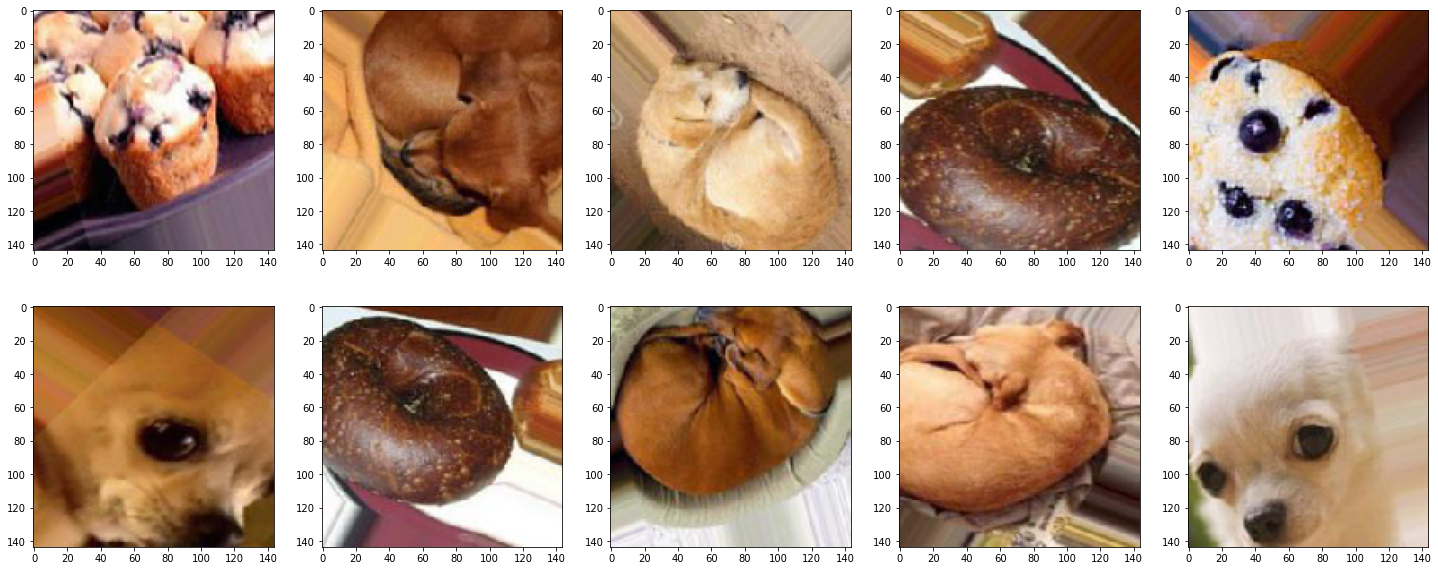

In [18]:
#Plotting the images in grid format
def predictImg():
  type = random.choice(os.listdir(savedir_1))
  path  = os.path.join(savedir_1,type)
  randimg = random.choice(os.listdir(path))
  img = load_img(os.path.join(savedir_1,type,randimg), target_size=(144,144))
  input_arr = img_to_array(img)/255
  return(input_arr)

rows=2
cols = 5
show = 10
img_count = 0
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(25,10))
names=[]
for i in range(rows):
    for j in range(cols):        
        if img_count < show:
            img = predictImg()
            axes[i, j].imshow(img)
            img_count+=1
            img = np.expand_dims(img,axis=0)
            pred=model.predict(img) 
            if pred[0][0] == max(pred[0]):
              names.append('Bagel')
            if pred[0][1] == max(pred[0]):
              names.append('Dog')
            if pred[0][2] == max(pred[0]):
              names.append('Chihuaha')
            if pred[0][3] == max(pred[0]):
              names.append('Muffin')
for i in range(10):
  print(names[i])

## Discussion based on predictions:
<hr>

Our model accuracy is close to 99% which is, near to perfect. As we observe in the confusion matrix below, we can observe how many images were incorrectly guessed and almost all images were correctly guessed hence almost all values are in diagonal element.

The accuracy for the images can be very much increasd if we get more new datasets which look-a-like to model to train. For now, using Image data generator has helped us overcome this challenge by sampling more images which are new for the machine to know.

In [19]:
mode = model.predict(test_Muffin)
answer = mode.argmax(axis=1)
print('Confusion Matrix')

mat = confusion_matrix(test_Muffin.classes, answer)
print(mat)
print('\n Classification Report')
print(classification_report(test_Muffin.classes, answer, target_names=types))

Confusion Matrix
[[90  0  0  0]
 [10 82  0  0]
 [ 0  5 86  1]
 [ 0  2  0 89]]

 Classification Report
              precision    recall  f1-score   support

       Bagel       0.90      1.00      0.95        90
    BagelDog       0.92      0.89      0.91        92
    Chihuaha       1.00      0.93      0.97        92
      Muffin       0.99      0.98      0.98        91

    accuracy                           0.95       365
   macro avg       0.95      0.95      0.95       365
weighted avg       0.95      0.95      0.95       365



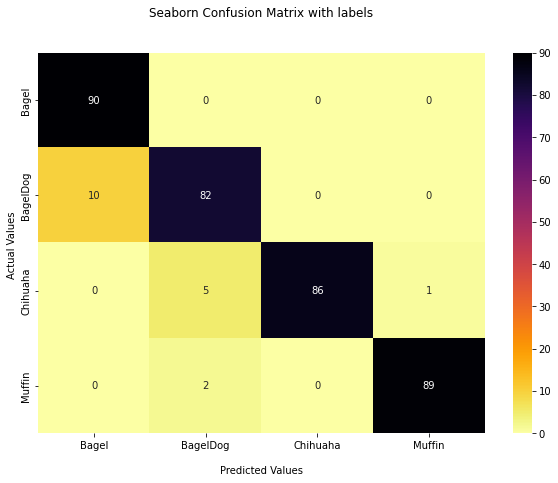

In [20]:
#Plotting the confusion matrix
plt.figure(figsize=(10,7))
ax = sns.heatmap(mat, annot=True, cmap='inferno_r')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(types)
ax.yaxis.set_ticklabels(types)

## Display the visualization of the Confusion Matrix.
plt.show()

## GUI to test the Model:

Upload an image from the meme and it will give the prediction, you can re-run this multiple times.

Saving bagel-1.jpg to bagel-1.jpg


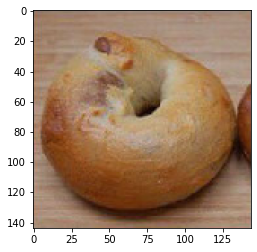



                                I think its 99.97417330741882% Bagel                                


In [21]:
uploaded = files.upload()

def ImageName(uploaded):
  for fn in uploaded.keys():
    picname = fn
    return picname


pic_name = ImageName(uploaded)

from keras.preprocessing.image import load_img, img_to_array
path = os.path.join('/content',pic_name)
img = load_img(path, target_size=(144,144))

input_arr = img_to_array(img)/255
plt.imshow(input_arr)
plt.show()


input_arr = np.expand_dims(input_arr,axis=0)
#pred = model.predict_classes(input_arr)
pred=model.predict(input_arr) 
classes_x=np.argmax(input_arr,axis=1)
prob = str(max(pred[0])*100)
print('\n')
if pred[0][0] == max(pred[0]):
  print(Fore.RED + ("I think its "+ prob +"% Bagel").center(100))
if pred[0][1] == max(pred[0]):
  print(Fore.RED + ("I think its " + prob + "% Dog looking like Bagel").center(100))
if pred[0][2] == max(pred[0]):
  print(Fore.RED + ("I think its " + prob +"% Chihuaha Dog").center(100))
if pred[0][3] == max(pred[0]):
  print(Fore.RED + ("I think its " + prob +"% Muffin").center(100))